In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [21]:
x_train = pd.read_csv('dos_inputtrain - Copy.csv',low_memory=False)

x_test = pd.read_csv('dos_inputtest - Copy.csv')


In [22]:
label_train = pd.read_csv('label_train.csv') 

In [23]:
label_test = pd.read_csv('label_test.csv') 

In [24]:
pd.set_option('display.max_columns', None)

In [25]:
X_train = x_train.iloc[::,:x_train.shape[1]-1]
X_test = x_test.iloc[::,:x_train.shape[1]-1]

In [26]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
encoder = OrdinalEncoder()
imputer = IterativeImputer(ExtraTreesRegressor())
le = LabelEncoder()
# create a list of categorical columns to iterate over
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in X_train.columns:
    encode(X_train[columns])
for columns in X_test.columns:
    encode(X_test[columns])

C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  il

C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  il

C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  il

C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  il

In [27]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
Xtrain_std = sc.fit_transform(X_train)
Xtest_std = sc.transform(X_test)

In [28]:
from sklearn import decomposition
# Create a pca object with the 6 components as a parameter
pca = decomposition.PCA(n_components=6)

# Fit the PCA and transform the data
Xtrain_std_pca = pca.fit_transform(Xtrain_std)
Xtest_std_pca = pca.fit_transform(Xtest_std)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(Xtrain_std_pca,label_train, test_size=0.1,random_state=0)

In [30]:
#df_train = pd.DataFrame(Xtrain_std_pca, columns =['A','B','C','D','E','F',])
#df_test = pd.DataFrame(Xtest_std_pca, columns =['A','B','C','D','E','F',])

In [36]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.optimizers import SGD

ERROR! Session/line number was not unique in database. History logging moved to new session 68


In [33]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
sgd = SGD(lr=0.05, momentum=0.8)
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [34]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=20,
          validation_data=(X_val, Y_val))

Train on 228996 samples, validate on 25445 samples
Epoch 1/20
228996/228996 [==============================] - 94s 410us/sample - loss: 0.5024 - acc: 0.7513 - val_loss: 0.4770 - val_acc: 0.7688
Epoch 2/20
228996/228996 [==============================] - 106s 464us/sample - loss: 0.4641 - acc: 0.7733 - val_loss: 0.4645 - val_acc: 0.7707
Epoch 3/20
228996/228996 [==============================] - 92s 400us/sample - loss: 0.4511 - acc: 0.7841 - val_loss: 0.4483 - val_acc: 0.7858
Epoch 4/20
228996/228996 [==============================] - 96s 420us/sample - loss: 0.4421 - acc: 0.7924 - val_loss: 0.4393 - val_acc: 0.7916
Epoch 5/20
228996/228996 [==============================] - 91s 396us/sample - loss: 0.4345 - acc: 0.7959 - val_loss: 0.4313 - val_acc: 0.7959
Epoch 6/20
228996/228996 [==============================] - 98s 428us/sample - loss: 0.4292 - acc: 0.7986 - val_loss: 0.4266 - val_acc: 0.7998
Epoch 7/20
228996/228996 [==============================] - 93s 406us/sample - loss: 0.425

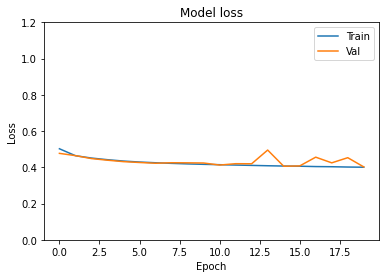

In [35]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\anaconda\envs\tf_GPU\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-070d989ccadb>", line 1, in <module>
    plt.plot(hist.history['accuracy'])
KeyError: 'accuracy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\anaconda\envs\tf_GPU\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\anaconda\envs\tf_GPU\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\anaconda\envs\tf_GPU\lib\site-packages\IPython\core\ultratb

In [42]:
yout = model.predict_classes(Xtest_std_pca)

In [43]:
yout

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [80]:
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(label_test,yout))

accuracy =  0.1680061115355233
